# TASK 2- Prediction using unsupervised ML

## AIM: From the given dataset, predict the optimum no. of clusters and represent it visually

## K Means Clustering Algorithm

# IMPORT

In [2]:
# import the required libraries

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.metrics as sm
import pylab

from pylab import rcParams
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn import datasets


Define the parameters for the Visualisation

In [ ]:
%matplotlib inline

rcParams["figure.figsize"] = 20,10

# Initialisation 

In [5]:
# load the iris dataset

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.columns = ["sepal length", "sepal width", "petal length", "petal width"]
target.columns = ["Target"]

# See the first 5 rows
iris_df.head(5)


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# scale the iris data

data = scale(iris.data)

#define the target
target = pd.DataFrame(iris.target)
data[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

# Building the Cluster Model

In [8]:
#how to find the optimum number of clusters for KMeans

x = iris_df.iloc[:,[0,1,2,3]].values

#within cluster sum of squares
wcss=[]

for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

The optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

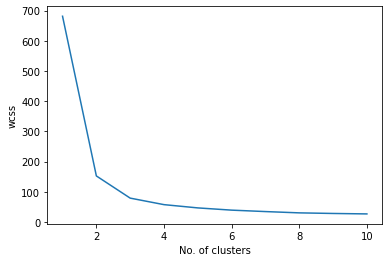

In [9]:
#plotting the results onto a line graph

plt.plot(range(1,11), wcss)
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.show()

From this, we chhose n_clusters = 3

In [10]:
# build the cluster model

clustering = KMeans(n_clusters=3, random_state=0)

#applying clustering to the dataset (creating a classifier)
c_cluster = clustering.fit_predict(x)

# Visualisation

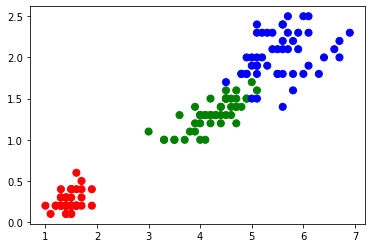

In [13]:
# scatter plot will be used for visualisation
# on petal lenth and petal width columns of the dataset

colors = np.array(["Red", "Green", "Blue"])
plt.scatter(x=iris_df["petal length"],  y=iris_df["petal width"], c=colors[iris.target], s=50)


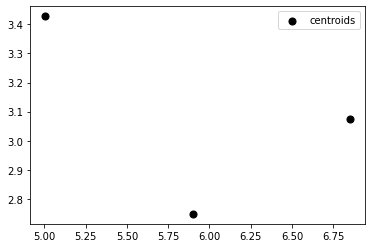

In [15]:
# plotting the centroids of the clusters

plt.scatter(clustering.cluster_centers_[:,0] , clustering.cluster_centers_[:,1] , s=50, c="black" , label ="centroids")
plt.legend()

##  Hence, predicted the optimum number of clusters in the given dataset

# Thank you!!